# Libraries

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

# Data

In [72]:
df = pd.read_csv(r'C:\Users\fagr\Desktop\ML_projects\DL\ANN\Space\star_classification.csv')

# show the head of data
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


obj_ID --> obj_ID Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha --> Right Ascension angle (at J2000 epoch)

delta --> Declination angle (at J2000 epoch)

u --> Ultraviolet filter in the photometric system

g --> Green filter in the photometric system

r --> Red filter in the photometric system

i --> Near Infrared filter in the photometric system

z --> Infrared filter in the photometric system

run_ID --> Run Number used to identify the specific scan

rereun_ID --> Rerun Number to specify how the image was processed

cam_col --> Camera column to identify the scanline within the run

field_ID --> Field number to identify each field

spec_obj_ID --> Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class --> object class (galaxy, star or quasar object)

redshift --> redshift value based on the increase in wavelength

plate --> plate ID, identifies each plate in SDSS

MJD --> Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID --> fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [74]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [75]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

# EDA

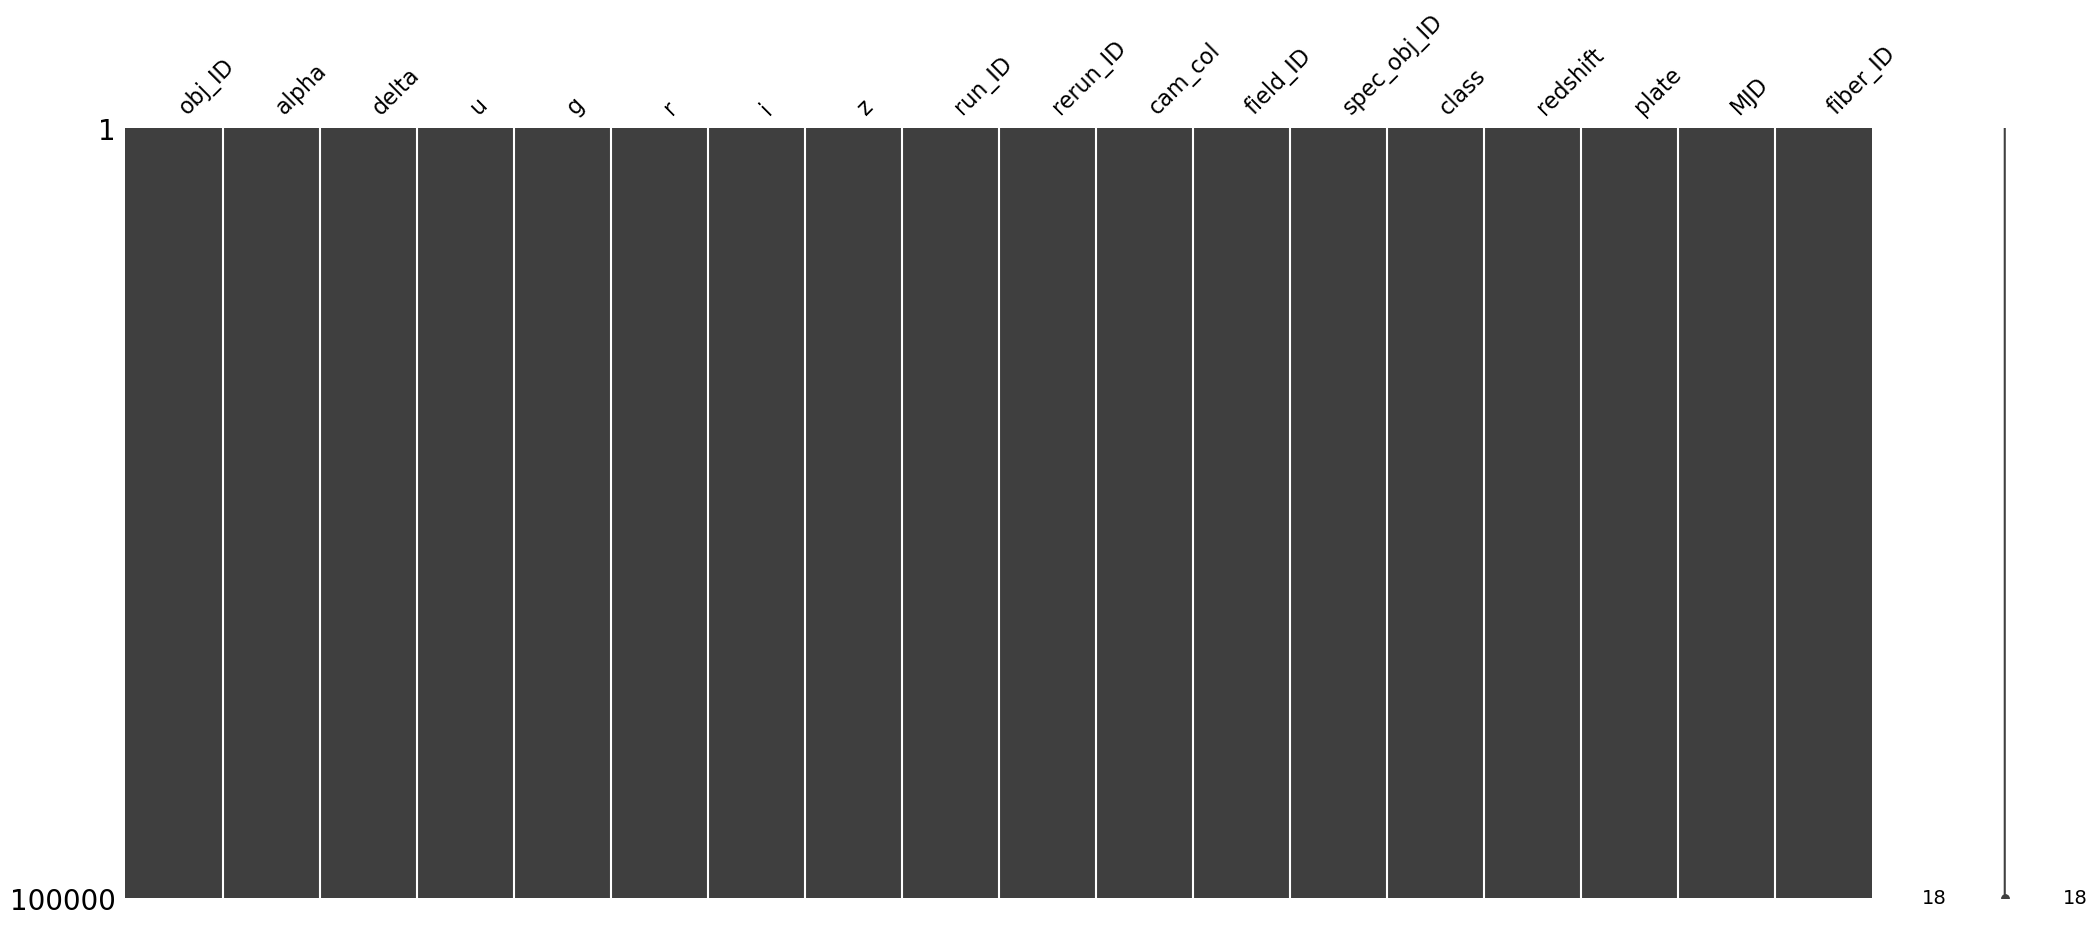

In [76]:
# check nulls using missingno
missingno.matrix(df)
plt.show()

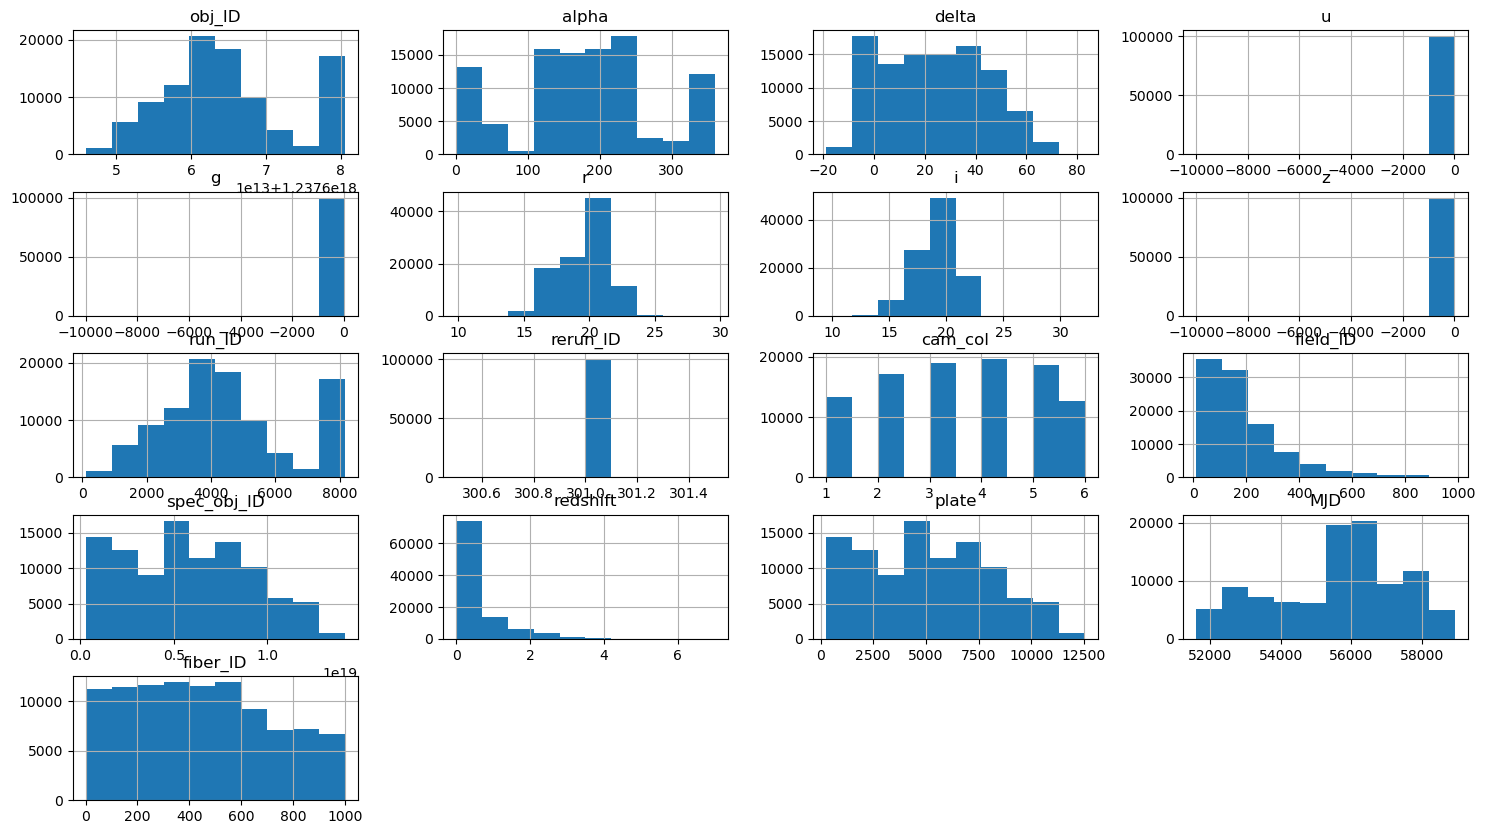

In [77]:
# histogram
df.hist(figsize = (18,10))
plt.show()

In [78]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

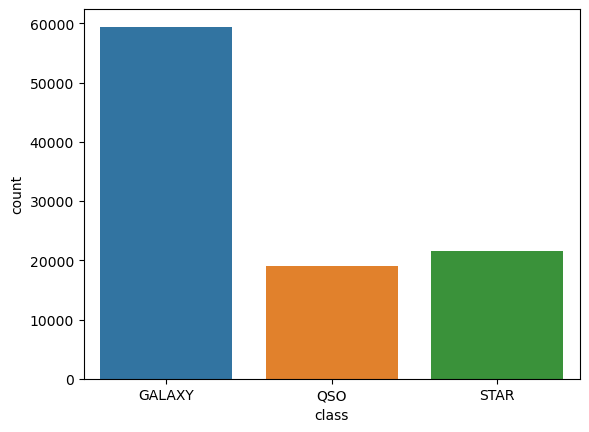

In [79]:
# count values for each class
sns.countplot( x = 'class' ,data= df )
plt.show()

C:\Users\fagr\AppData\Local\Temp\ipykernel_8484\1474834049.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot = True ,cmap = 'Blues' )


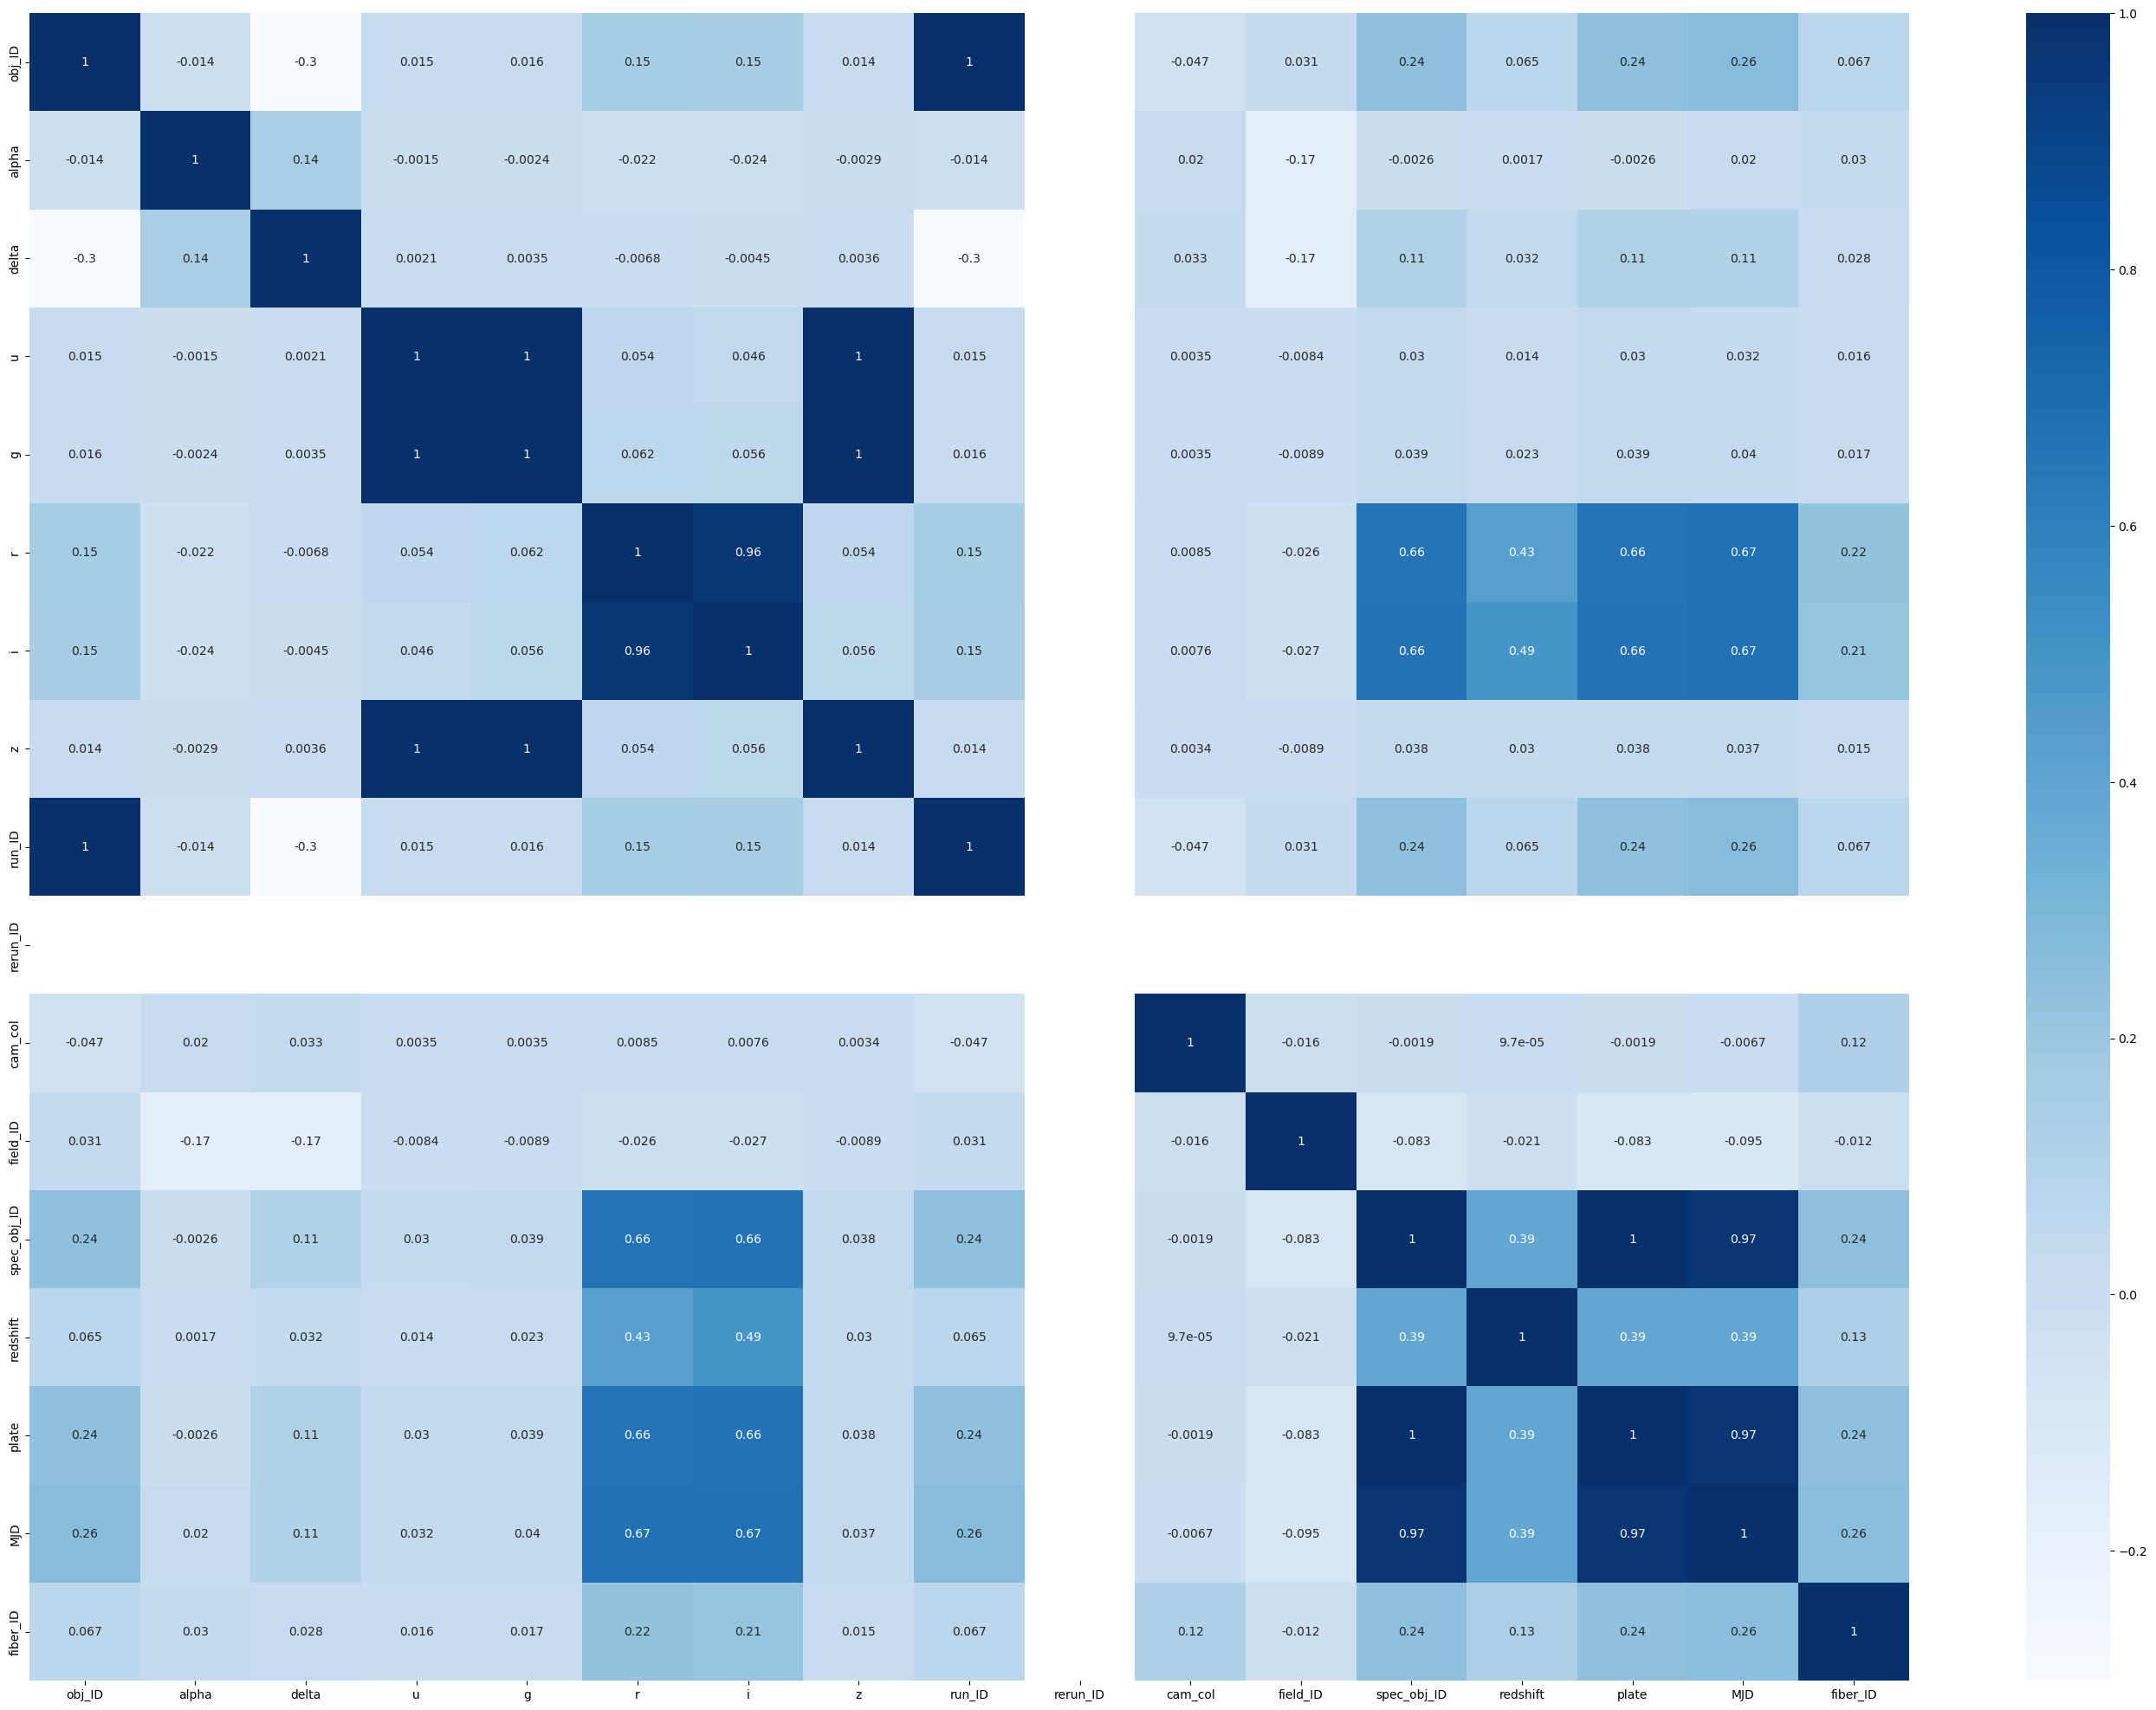

In [80]:
# heatmap to show correlation between features
plt.figure(figsize=(35,25))
sns.heatmap(df.corr() ,annot = True ,cmap = 'Blues' )
plt.show()

# Split Data

In [81]:
# split to x & y
x = pd.DataFrame(df.drop(['class'] ,axis = 1))
y = pd.DataFrame(df['class'])
x

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470


In [122]:
# split to train & test
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y, test_size = 0.2 , shuffle= True ,random_state= 42)

In [123]:
# split to train & validation
x_train ,x_val , y_train ,y_val = train_test_split(x_train ,y_train ,test_size = 0.125 ,shuffle=True ,random_state= 42)

In [124]:
print ("shape of x_train" , x_train.shape)
print ("shape of x_val" , x_val.shape)
print ("shape of x_test" , x_test.shape)

shape of x_train (70000, 17)
shape of x_val (10000, 17)
shape of x_test (20000, 17)


# Preprocessing

In [125]:
x_train = x_train.drop(columns = ['obj_ID'] ,axis =1)
x_val = x_val.drop(columns = ['obj_ID'] ,axis =1)
x_test = x_test.drop(columns = ['obj_ID'] ,axis =1)

In [86]:
x.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [87]:
num_cols = [col for col in x_train.columns]
categ_cols = [col for col in y_train.columns]
num_cols

['alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [126]:
# total Pipeline

pip_num = Pipeline(steps = [
    ('Selector' , DataFrameSelector(num_cols)),
    ('scaler' , StandardScaler())
])


pip_num.fit(x_train)
final_x_train =pip_num.transform(x_train)
final_x_val = pip_num.transform(x_val)
final_x_test = pip_num.transform(x_test)

In [127]:
# encode target classes
encoded = LabelEncoder()
encoded.fit(y_train.values.ravel())
y_train = encoded.transform(y_train.values.ravel())
y_val = encoded.transform(y_val.values.ravel())
y_test = encoded.transform(y_test.values.ravel())

In [128]:
# apply to_categorical
final_y_train = to_categorical(y_train)
final_y_val = to_categorical(y_val)
final_y_test = to_categorical(y_test)

# ANN Model

In [91]:
# build model
model = Sequential()
model.add(Dense(40 ,input_shape=(16,) , activation = 'relu'))
model.add(Dense(80 , activation = 'relu'))
model.add(Dense(100 , activation = 'relu'))
model.add(Dense(80 , activation = 'relu'))
model.add(Dense(3 , activation = 'softmax'))

In [92]:
# choose optimizer & metrics
model.compile (optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# check point
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Early stopping 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [93]:
#fit model
model.fit(final_x_train , final_y_train , validation_data = (final_x_val , final_y_val),
                         epochs = 100 , batch_size = 20 , callbacks = [early_stopping , checkpoint])

Epoch 1/100
3482/3500 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9235
Epoch 1: val_accuracy improved from -inf to 0.95630, saving model to best_model.h5
3500/3500 [==============================] - 9s 2ms/step - loss: 0.2385 - accuracy: 0.9235 - val_loss: 0.1417 - val_accuracy: 0.9563
Epoch 2/100
  84/3500 [..............................] - ETA: 6s - loss: 0.1662 - accuracy: 0.9488

C:\Users\fagr\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3500/3500 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9534
Epoch 2: val_accuracy improved from 0.95630 to 0.96310, saving model to best_model.h5
3500/3500 [==============================] - 8s 2ms/step - loss: 0.1432 - accuracy: 0.9534 - val_loss: 0.1192 - val_accuracy: 0.9631
Epoch 3/100
3498/3500 [============================>.] - ETA: 0s - loss: 0.1296 - accuracy: 0.9589
Epoch 3: val_accuracy did not improve from 0.96310
3500/3500 [==============================] - 7s 2ms/step - loss: 0.1296 - accuracy: 0.9589 - val_loss: 0.1213 - val_accuracy: 0.9618
Epoch 4/100
3497/3500 [============================>.] - ETA: 0s - loss: 0.1238 - accuracy: 0.9605
Epoch 4: val_accuracy did not improve from 0.96310
3500/3500 [==============================] - 7s 2ms/step - loss: 0.1238 - accuracy: 0.9605 - val_loss: 0.1518 - val_accuracy: 0.9495
Epoch 5/100
3496/3500 [============================>.] - ETA: 0s - loss: 0.1205 - accuracy: 0.9613
Epoch 5: val_accuracy did not

In [95]:
train_loss ,train_accuracy = model.evaluate(final_x_train)
print("train loss: " , train_loss)
print("train accuracy: ", train_accuracy)

2188/2188 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
train loss:  0.0
train accuracy:  0.0


In [96]:
val_loss ,val_accuracy = model.evaluate(final_x_val)
print("train loss: " , val_loss)
print("train accuracy: ", val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
train loss:  0.0
train accuracy:  0.0


In [129]:
# predict test dat
pred = model.predict(final_x_test)

625/625 [==============================] - 1s 921us/step


In [130]:
pred

array([[9.9454862e-01, 5.4510850e-03, 2.7823975e-07],
       [4.6837911e-02, 1.1957114e-04, 9.5304257e-01],
       [9.3900038e-05, 9.5595688e-08, 9.9990594e-01],
       ...,
       [9.9445903e-01, 5.5402475e-03, 7.3495738e-07],
       [9.9814546e-01, 1.8545965e-03, 3.1590936e-08],
       [9.9333018e-01, 6.6693928e-03, 3.8874404e-07]], dtype=float32)

In [139]:
y_pred = np.argmax(pred,axis=1)

In [141]:
prediction = pd.DataFrame(y_pred ,columns = ['y_pred'])
prediction['y_test'] = y_test
prediction

,y_pred,y_test
0,0,0
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
19995,0,0
19996,0,0
19997,0,0
19998,0,0


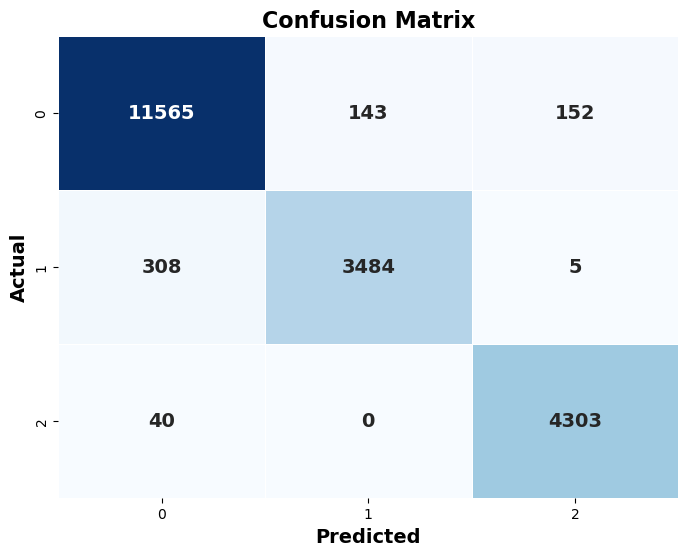

In [143]:
predictions = []
for i in range(len(y_pred)):
    predictions.append(np.argmax(pred[i]))
z= np.array(predictions)


# confusion matrix
confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [144]:
# classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11860
           1       0.96      0.92      0.94      3797
           2       0.96      0.99      0.98      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

